
=== Reverted CategoricalNB ===
Accuracy: 0.6143
              precision    recall  f1-score   support

           0       0.63      0.92      0.74       456
           1       0.78      0.80      0.79       539
           2       0.74      0.32      0.44       209
           3       0.67      0.08      0.15        24
           4       0.55      0.15      0.24        39
           5       0.52      0.56      0.54       674
           6       0.52      0.60      0.56       596
           7       1.00      0.35      0.52        17
           8       0.62      0.18      0.28        28
           9       0.75      0.57      0.64       152
          10       1.00      0.08      0.15        38
          11       0.65      0.35      0.45       228

    accuracy                           0.61      3000
   macro avg       0.70      0.41      0.46      3000
weighted avg       0.63      0.61      0.60      3000



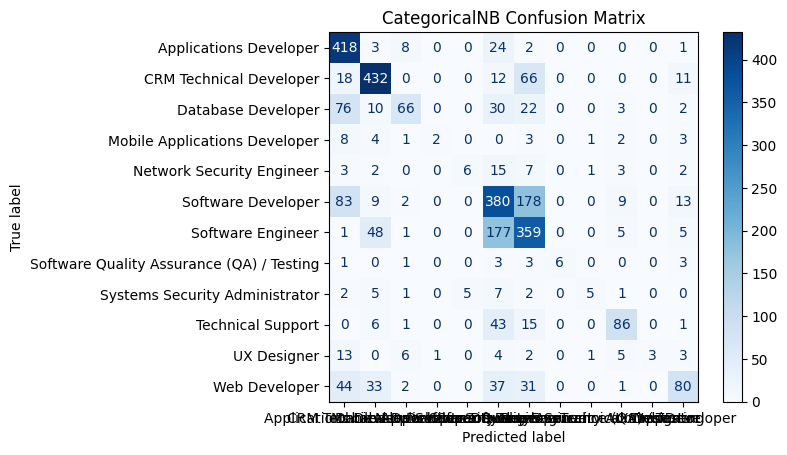

c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with 


=== Enhanced MultinomialNB ===
Accuracy: 0.4713
              precision    recall  f1-score   support

           0       0.40      0.88      0.54       456
           1       0.56      0.74      0.64       539
           2       0.90      0.22      0.35       209
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00        39
           5       0.48      0.26      0.34       674
           6       0.45      0.51      0.48       596
           7       1.00      0.41      0.58        17
           8       0.33      0.07      0.12        28
           9       0.38      0.36      0.37       152
          10       0.50      0.18      0.27        38
          11       1.00      0.08      0.15       228

    accuracy                           0.47      3000
   macro avg       0.50      0.31      0.32      3000
weighted avg       0.53      0.47      0.43      3000



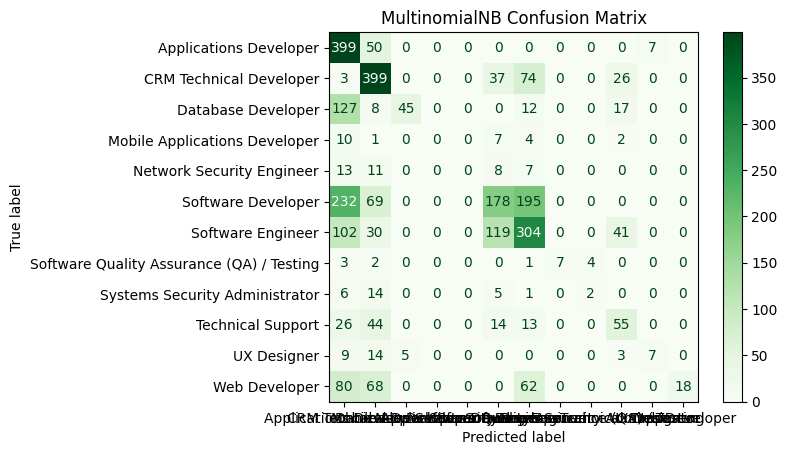

C:\Users\vbhav\AppData\Local\Temp\ipykernel_28932\3410371376.py:140: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_binary = X_train[binary_cols].replace({"yes": 1, "no": 0})
C:\Users\vbhav\AppData\Local\Temp\ipykernel_28932\3410371376.py:141: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test_binary = X_test[binary_cols].replace({"yes": 1, "no": 0})
c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



=== Improved BernoulliNB ===
Accuracy: 0.3910
              precision    recall  f1-score   support

           0       0.46      0.68      0.55       456
           1       0.43      0.75      0.54       539
           2       0.22      0.37      0.27       209
           3       0.07      0.12      0.09        24
           4       0.09      0.23      0.12        39
           5       0.55      0.11      0.18       674
           6       0.49      0.25      0.33       596
           7       0.35      0.41      0.38        17
           8       0.33      0.07      0.12        28
           9       0.36      0.59      0.44       152
          10       0.29      0.29      0.29        38
          11       0.31      0.19      0.24       228

    accuracy                           0.39      3000
   macro avg       0.33      0.34      0.30      3000
weighted avg       0.43      0.39      0.36      3000



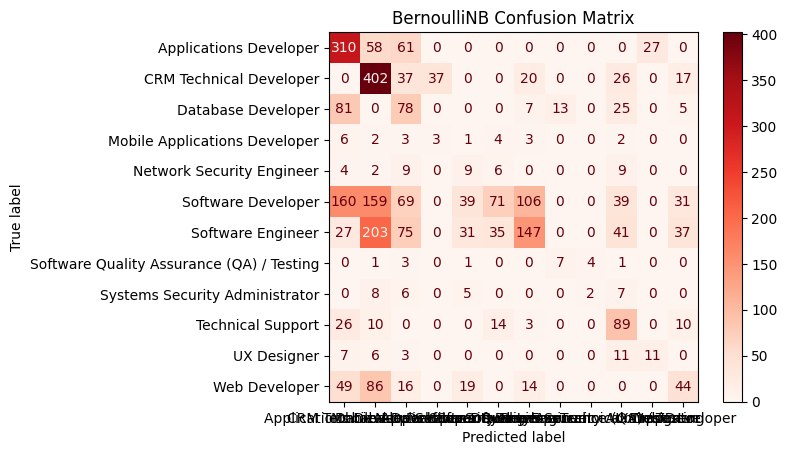

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import (
    MinMaxScaler, 
    LabelEncoder, 
    OrdinalEncoder, 
    KBinsDiscretizer
)
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import CategoricalNB, MultinomialNB, BernoulliNB
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)
from sklearn.utils.validation import check_array
from scipy.sparse import hstack

# Load and preprocess data
df = pd.read_csv('cleaned_data.csv')
# Feature engineering
df['memory_work_ethic'] = df['memory capability score'].astype(str) + "_" + df['hard/smart worker']
df['num_keywords'] = df['keywords'].apply(lambda x: len(x.split(', ')))

# Feature lists
numeric_features = [
    "Logical quotient rating", 
    "hackathons", 
    "coding skills rating",
    "public speaking points",
    "memory capability score"
]

binary_cols = [
    "self-learning capability?", 
    "Extra-courses did", 
    "worked in teams ever?", 
    "Introvert"
]

categorical_cols = [
    "keywords", "workshops", "reading and writing skills",
    "certifications", "Interested subjects", "interested career area ",
    "Type of company want to settle in?", "Interested Type of Books",
    "Management or Technical", "hard/smart worker", "memory capability score"
]


# Convert scores to numeric
score_map = {"poor": 1, "medium": 2, "excellent": 3}
df["memory capability score"] = df["memory capability score"].str.lower().map(score_map)
df["public speaking points"] = df["public speaking points"].astype(int)

# Encode target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["SuggestedJobRole"])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("SuggestedJobRole", axis=1), 
    y, 
    test_size=0.3, 
    random_state=42
)

# Encode categorical features using LabelEncoder
X_train_cat = X_train[categorical_cols].apply(LabelEncoder().fit_transform)
X_test_cat = X_test[categorical_cols].apply(lambda col: LabelEncoder().fit(col).transform(col))

# Handle potential missing categories in test set by filling with -1
X_test_cat = X_test_cat.where(pd.notnull(X_test_cat), -1)

# Train and evaluate
catnb = CategoricalNB(min_categories=10)
catnb.fit(X_train_cat, y_train)
y_pred = catnb.predict(X_test_cat)

print("\n=== Reverted CategoricalNB ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title('CategoricalNB Confusion Matrix')
plt.show()


# ========== Enhanced MultinomialNB ==========
# Text processing
tfidf = TfidfVectorizer(
    tokenizer=lambda x: x.split(", "),
    ngram_range=(1, 2),
    max_features=1000,
    sublinear_tf=True
)

# Feature scaling
scaler = MinMaxScaler()

# Prepare features
X_train_keywords = tfidf.fit_transform(X_train['keywords'])
X_train_numeric = scaler.fit_transform(X_train[numeric_features])
X_train_multi = hstack([X_train_keywords, X_train_numeric])

X_test_keywords = tfidf.transform(X_test['keywords'])
X_test_numeric = scaler.transform(X_test[numeric_features])
X_test_multi = hstack([X_test_keywords, X_test_numeric])

# Train and evaluate
mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train_multi, y_train)
y_pred_multi = mnb.predict(X_test_multi)

print("\n=== Enhanced MultinomialNB ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_multi):.4f}")
print(classification_report(y_test, y_pred_multi))

# Confusion Matrix
cm_multi = confusion_matrix(y_test, y_pred_multi)
disp_multi = ConfusionMatrixDisplay(confusion_matrix=cm_multi, display_labels=label_encoder.classes_)
disp_multi.plot(cmap='Greens')
plt.title('MultinomialNB Confusion Matrix')
plt.show()

# ========== Improved BernoulliNB ==========
# Binary features
vectorizer_bern = CountVectorizer(
    tokenizer=lambda x: x.split(", "),
    binary=True,
    max_features=500,
    ngram_range=(1, 2)
)

X_train_binary = X_train[binary_cols].replace({"yes": 1, "no": 0})
X_test_binary = X_test[binary_cols].replace({"yes": 1, "no": 0})

# Combine features
X_train_bern = hstack([
    vectorizer_bern.fit_transform(X_train['keywords']),
    X_train_binary,
    X_train[['num_keywords']]
])

X_test_bern = hstack([
    vectorizer_bern.transform(X_test['keywords']),
    X_test_binary,
    X_test[['num_keywords']]
])

# Train and evaluate
bnb = BernoulliNB(alpha=0.25)
bnb.fit(X_train_bern, y_train)
y_pred_bern = bnb.predict(X_test_bern)

print("\n=== Improved BernoulliNB ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bern):.4f}")
print(classification_report(y_test, y_pred_bern))

# Confusion Matrix
cm_bern = confusion_matrix(y_test, y_pred_bern)
disp_bern = ConfusionMatrixDisplay(confusion_matrix=cm_bern, display_labels=label_encoder.classes_)
disp_bern.plot(cmap='Reds')
plt.title('BernoulliNB Confusion Matrix')
plt.show()

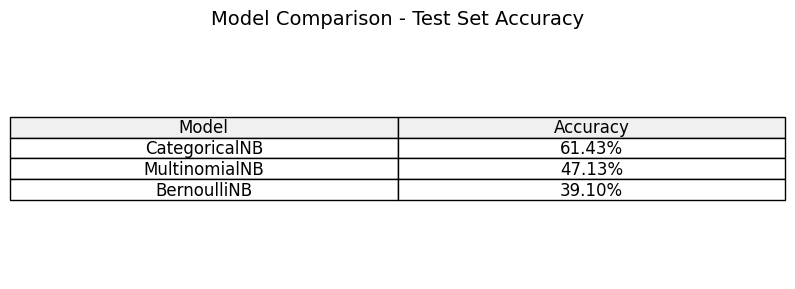

In [5]:
results = {
    'Model': ['CategoricalNB', 'MultinomialNB', 'BernoulliNB'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_multi),
        accuracy_score(y_test, y_pred_bern)
    ]
}

results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)
results_df['Accuracy'] = results_df['Accuracy'].map('{:.2%}'.format)

plt.figure(figsize=(8, 3))
plt.axis('off')
plt.title("Model Comparison - Test Set Accuracy", fontsize=14, pad=10)
table = plt.table(cellText=results_df.values,
                 colLabels=results_df.columns,
                 loc='center',
                 cellLoc='center',
                 colColours=['#f0f0f0']*2)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.tight_layout()
plt.show()



## Decision Tree

c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



=== Default Decision Tree ===
Accuracy: 0.5897
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       456
           1       0.77      0.78      0.77       539
           2       0.49      0.47      0.48       209
           3       0.06      0.08      0.07        24
           4       0.17      0.23      0.19        39
           5       0.53      0.54      0.53       674
           6       0.57      0.56      0.57       596
           7       0.63      0.71      0.67        17
           8       0.19      0.21      0.20        28
           9       0.55      0.61      0.57       152
          10       0.48      0.39      0.43        38
          11       0.46      0.42      0.44       228

    accuracy                           0.59      3000
   macro avg       0.47      0.48      0.47      3000
weighted avg       0.59      0.59      0.59      3000



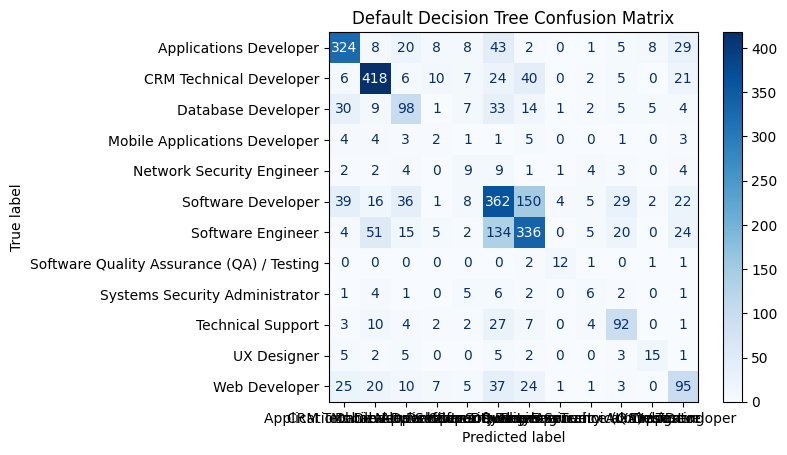


=== Entropy-Limited Tree ===
Accuracy: 0.3967
              precision    recall  f1-score   support

           0       0.34      0.81      0.48       456
           1       0.41      0.82      0.54       539
           2       0.00      0.00      0.00       209
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00        39
           5       0.54      0.12      0.19       674
           6       0.43      0.46      0.44       596
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00        28
           9       0.00      0.00      0.00       152
          10       0.00      0.00      0.00        38
          11       0.49      0.11      0.19       228

    accuracy                           0.40      3000
   macro avg       0.18      0.19      0.15      3000
weighted avg       0.37      0.40      0.32      3000



c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


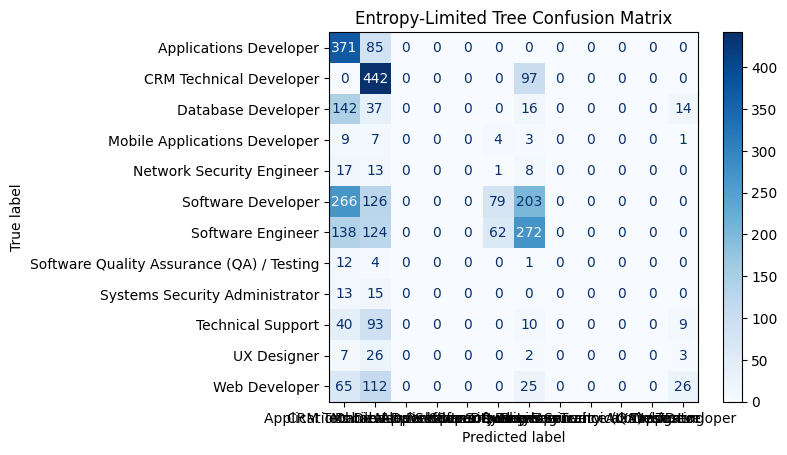


=== Regularized Tree ===
Accuracy: 0.4157
              precision    recall  f1-score   support

           0       0.33      0.94      0.49       456
           1       0.69      0.58      0.63       539
           2       0.81      0.11      0.19       209
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00        39
           5       0.49      0.20      0.28       674
           6       0.47      0.37      0.41       596
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00        28
           9       0.20      0.53      0.29       152
          10       0.50      0.03      0.05        38
          11       0.76      0.20      0.31       228

    accuracy                           0.42      3000
   macro avg       0.35      0.25      0.22      3000
weighted avg       0.51      0.42      0.39      3000



c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


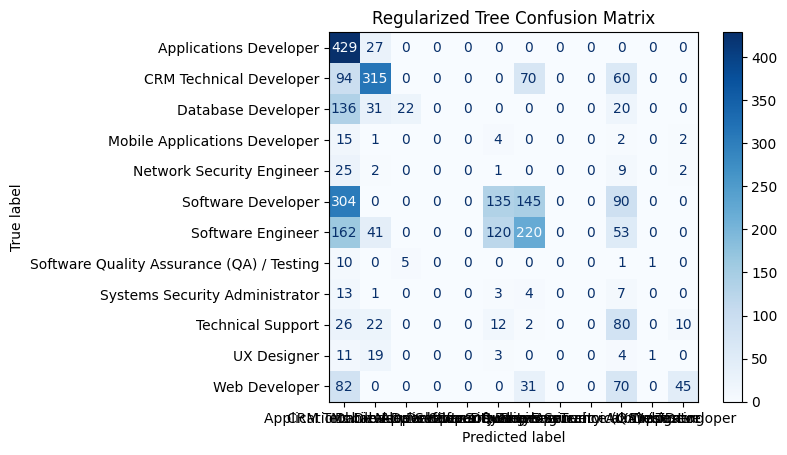

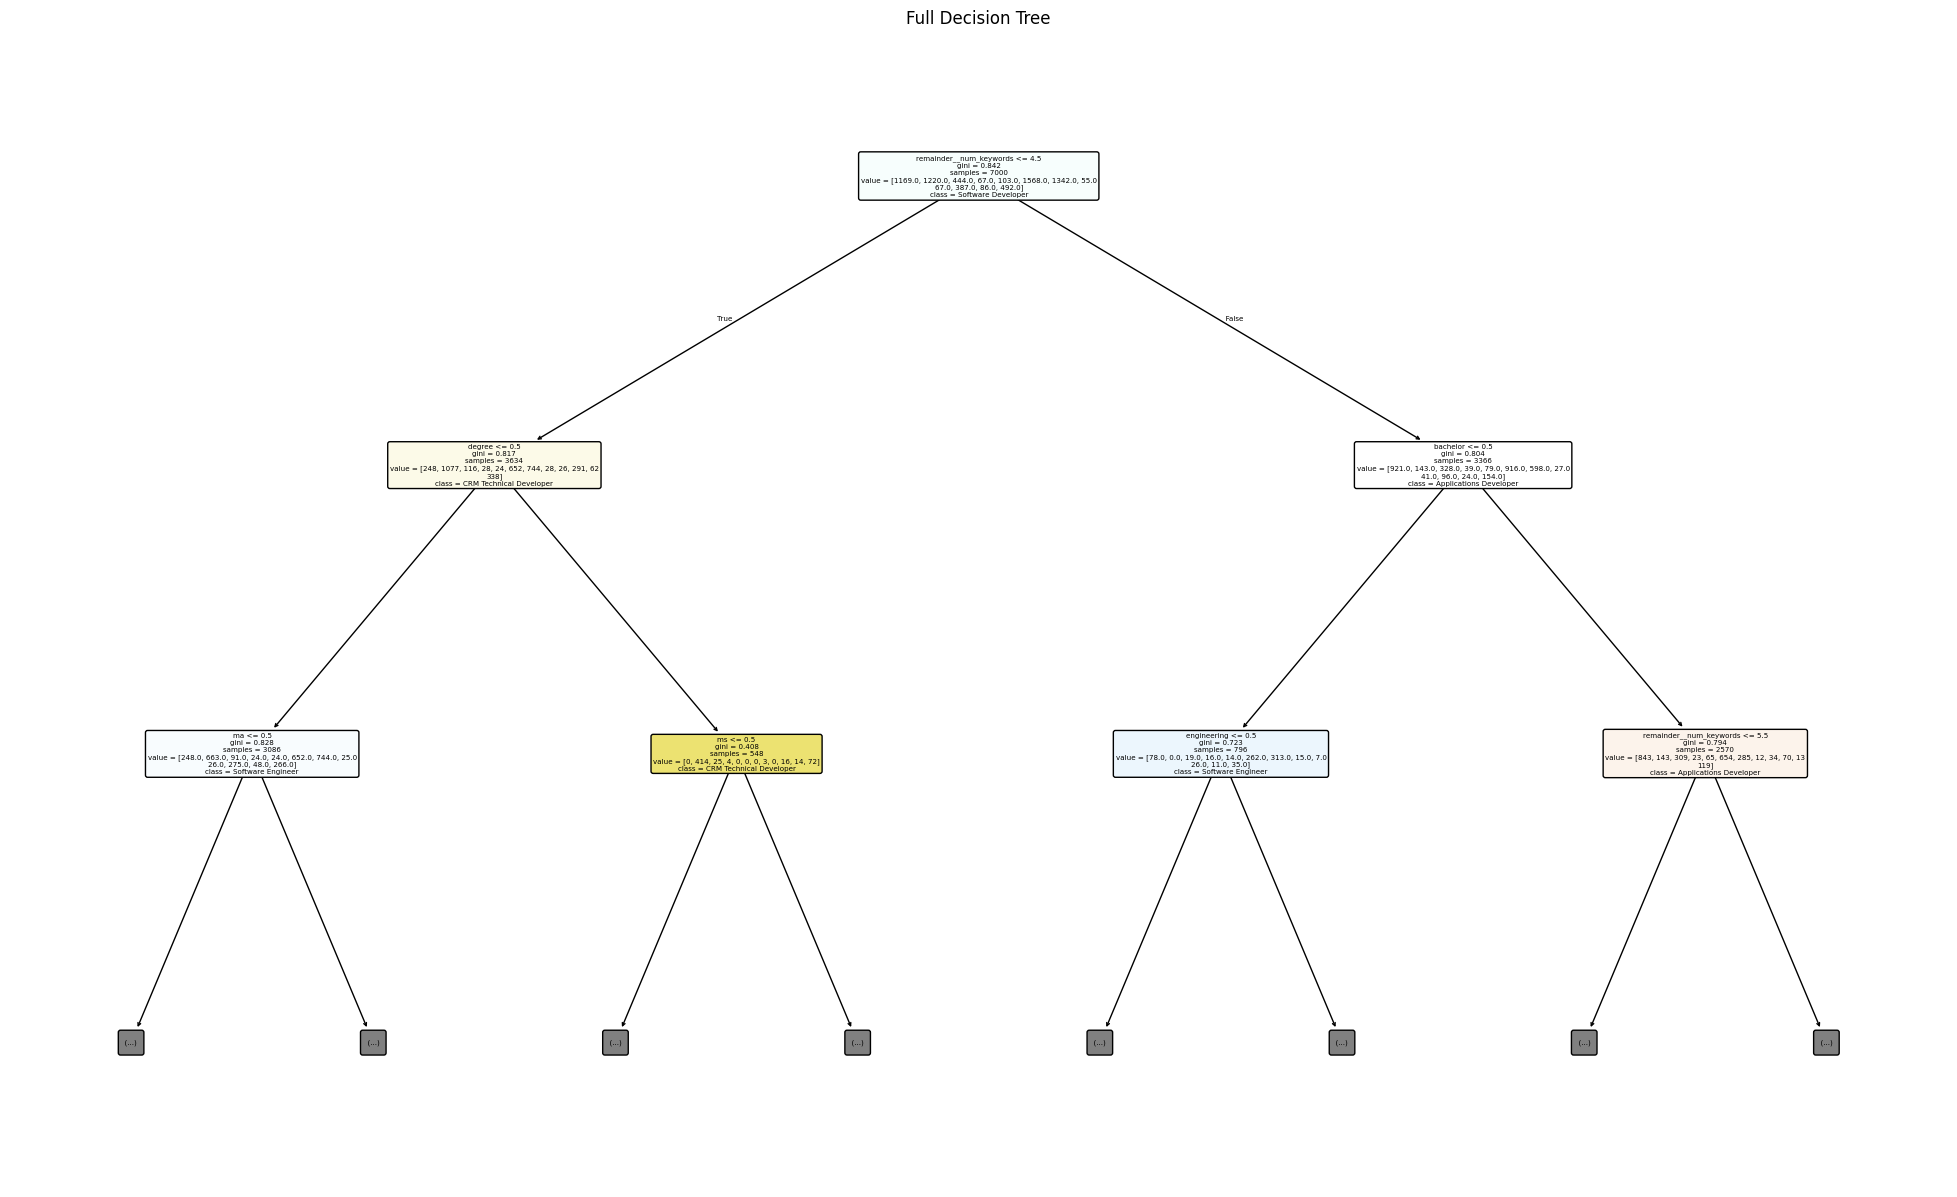

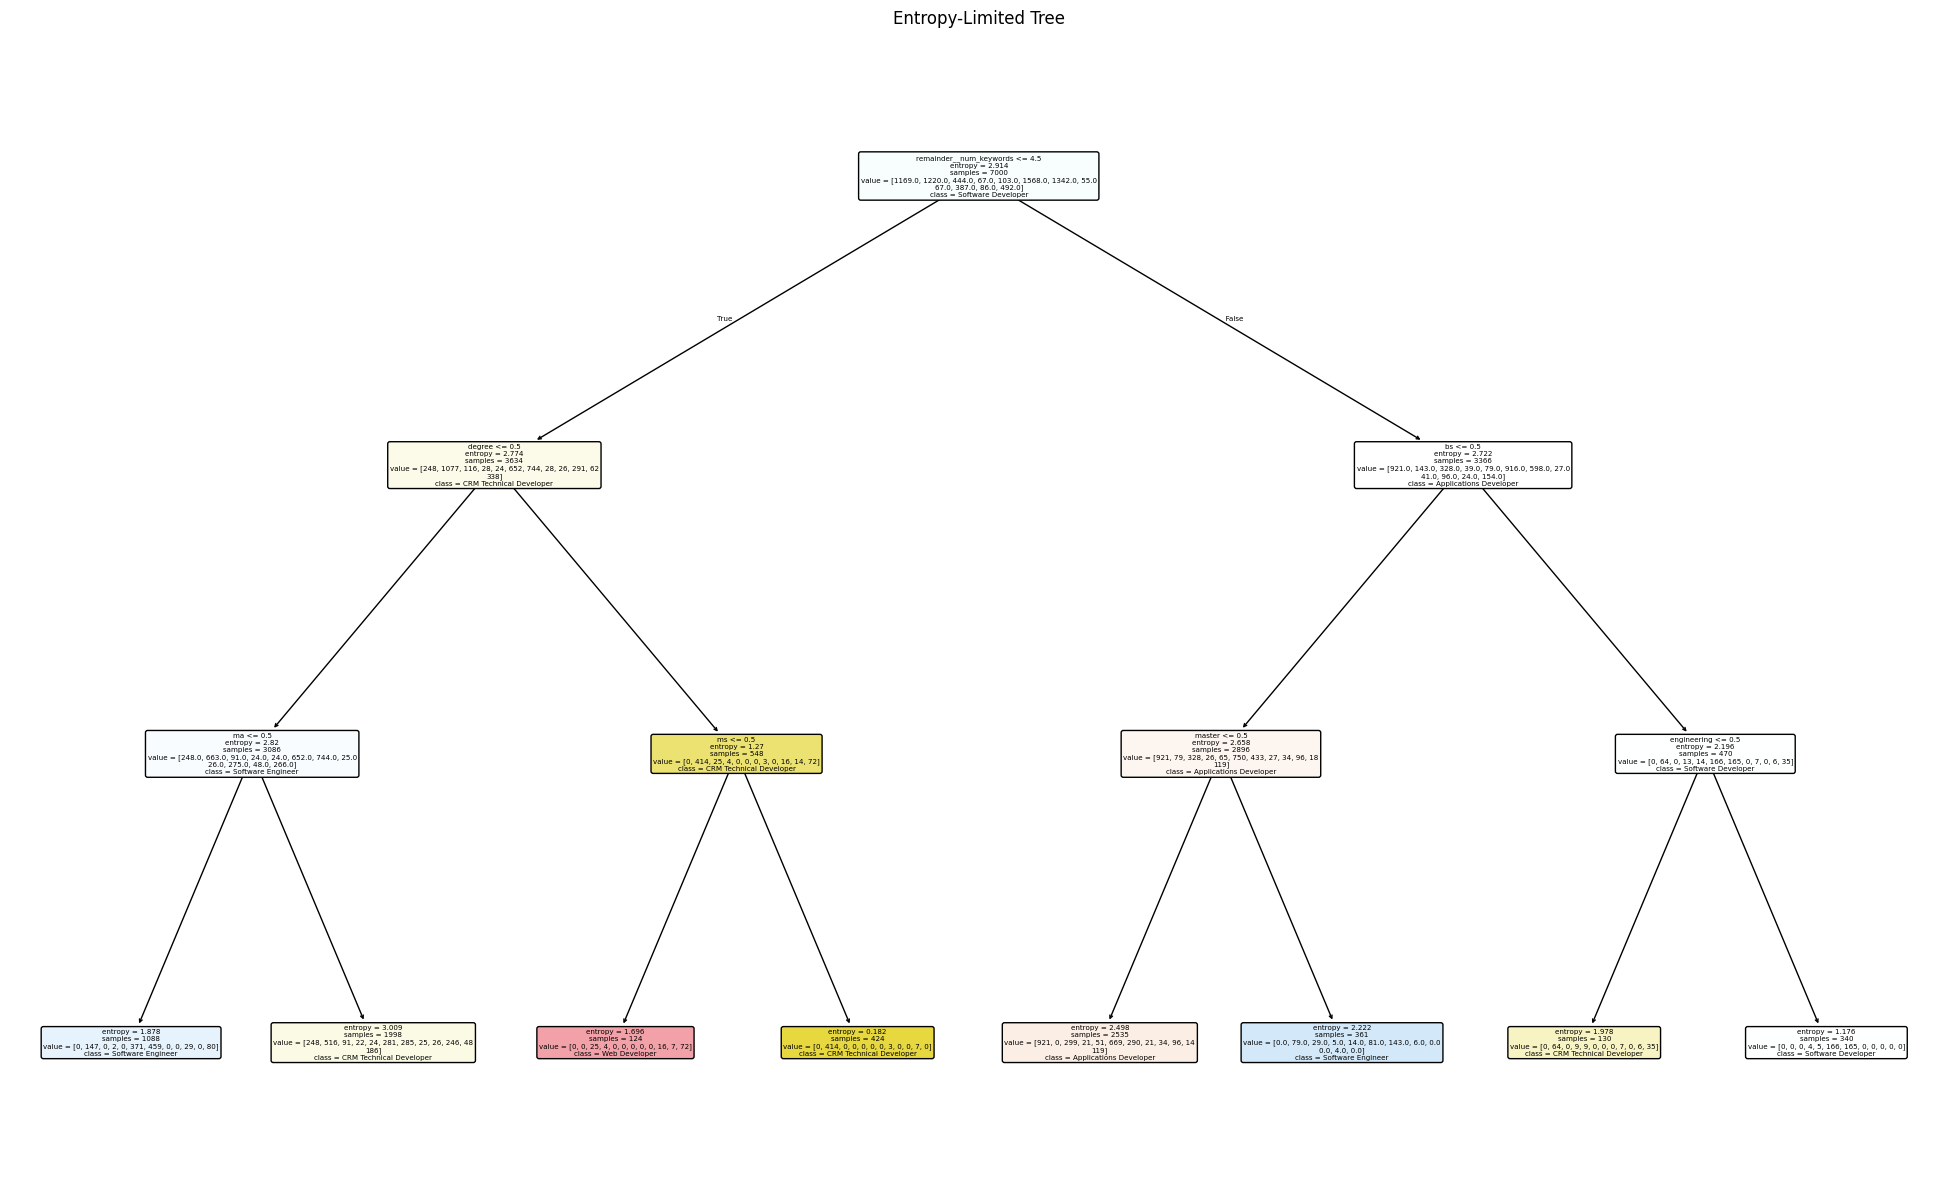

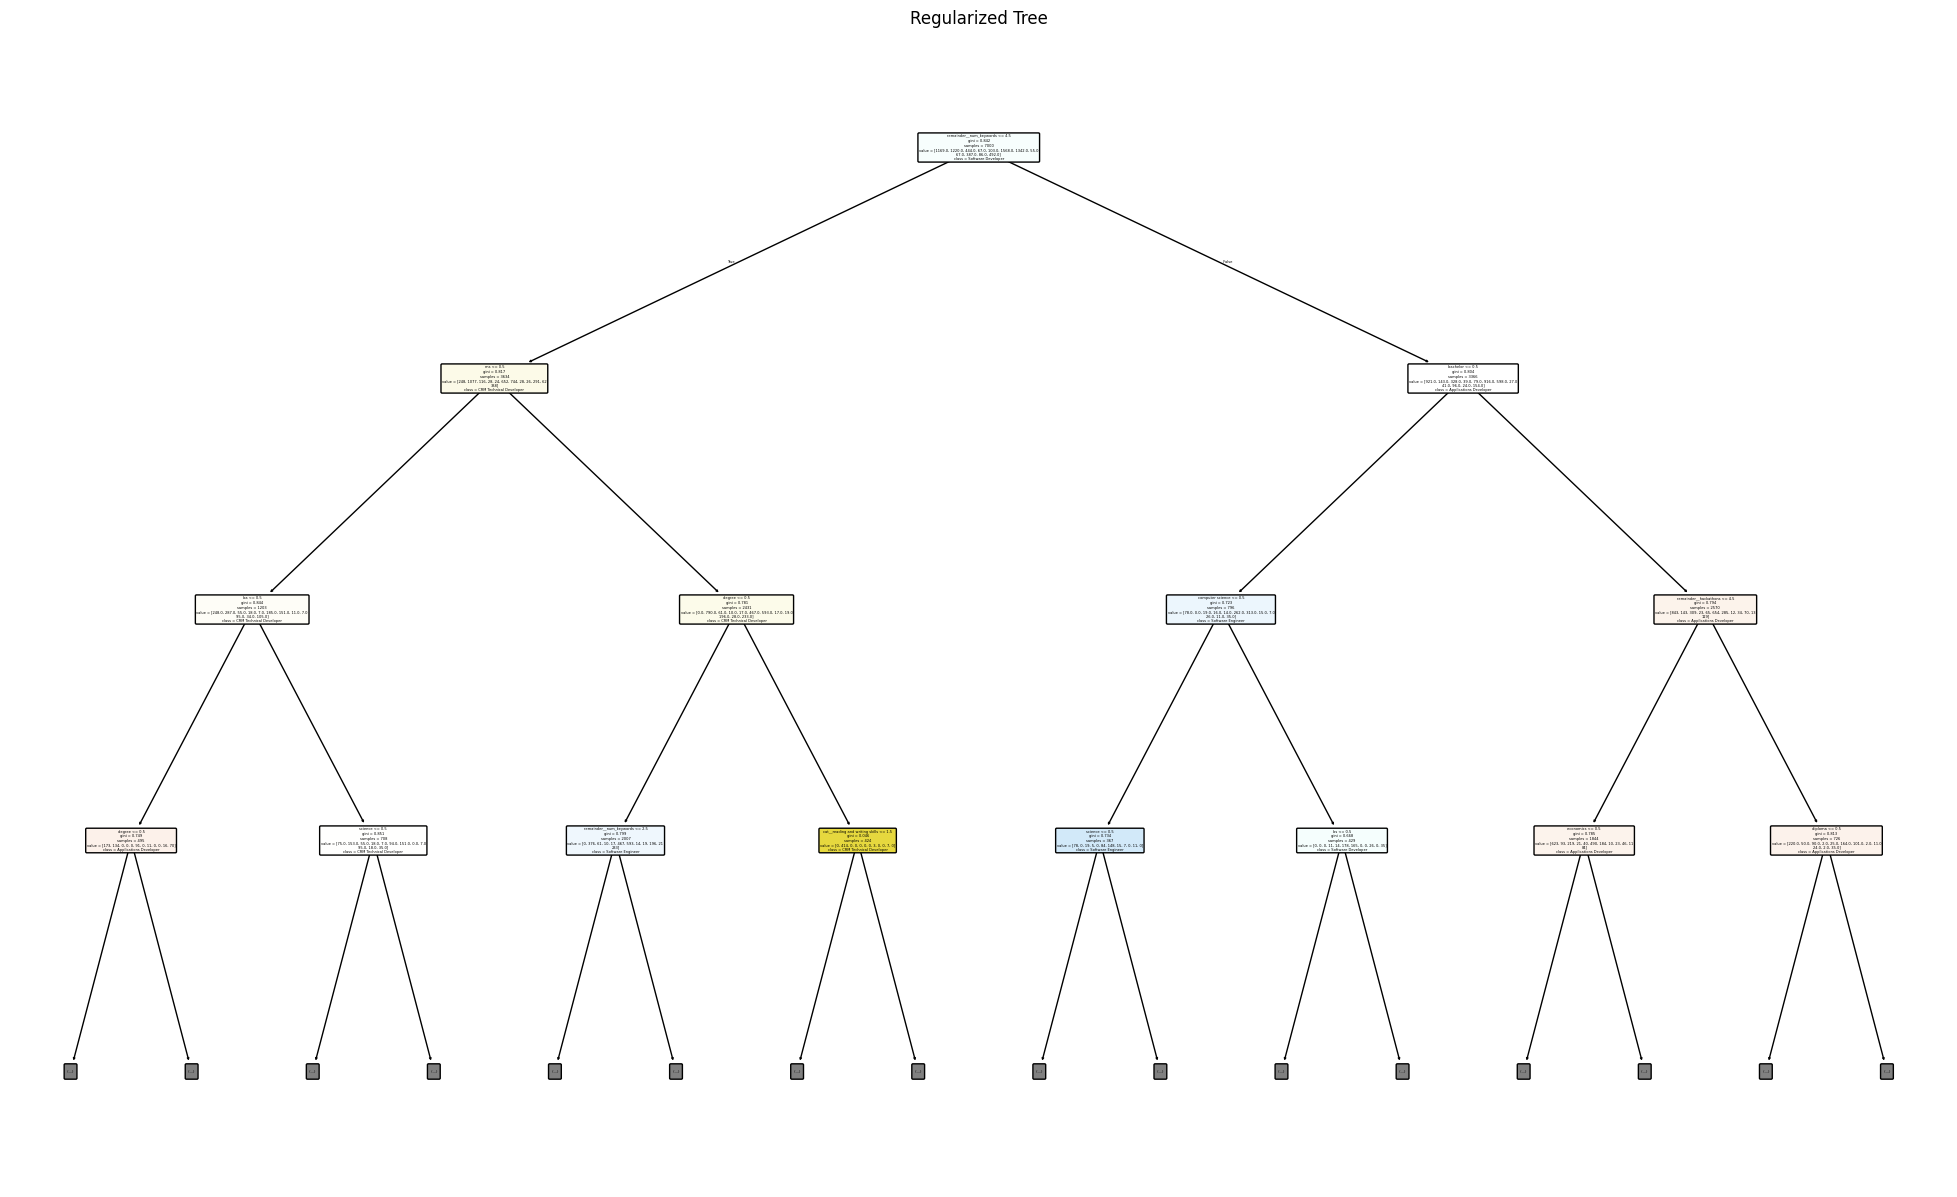

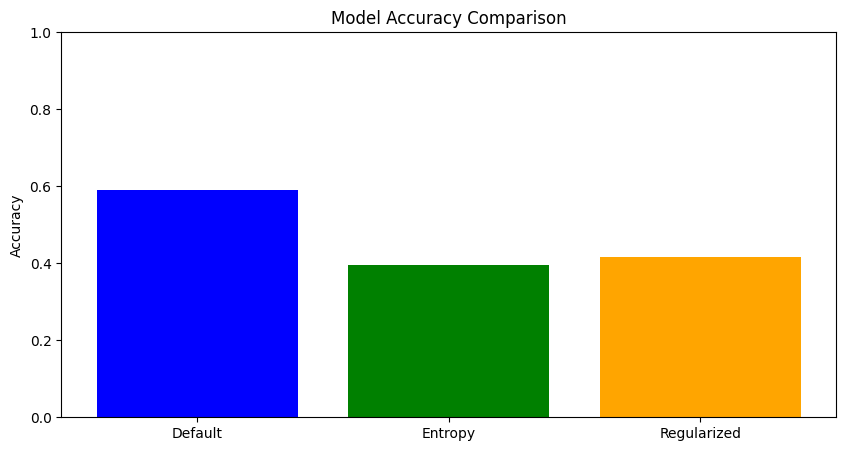

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack, csr_matrix

# Load data
df = pd.read_csv('cleaned_data.csv')

# ... (keep all previous imports)

# Load data
df = pd.read_csv('cleaned_data.csv')

# ================== Feature Engineering ==================
df['keywords'] = df['keywords'].fillna('')
df['memory_work_ethic'] = df['memory capability score'].astype(str) + "_" + df['hard/smart worker']
df['num_keywords'] = df['keywords'].apply(lambda x: len(x.split(', ')))

# ================== Column Definitions ==================
numeric_features = [
    "Logical quotient rating", 
    "hackathons", 
    "coding skills rating",
    "public speaking points",
    "memory capability score",
    "num_keywords"
]

binary_cols = [
    "self-learning capability?", 
    "Extra-courses did", 
    "worked in teams ever?", 
    "Introvert"
]

categorical_cols = [
    "Interested subjects", 
    "Type of company want to settle in?",
    "Interested Type of Books", 
    "Management or Technical", 
    "hard/smart worker",
    "certifications", 
    "workshops", 
    "reading and writing skills",
    "memory_work_ethic",
    "interested career area ",  # With trailing space
    "Taken inputs from seniors or elders"
]

# ================== Data Validation ==================
required_columns = set(numeric_features + binary_cols + categorical_cols + ["SuggestedJobRole", "keywords"])
missing_columns = required_columns - set(df.columns)
if missing_columns:
    raise ValueError(f"Missing columns: {missing_columns}")

# ================== Preprocessing ==================
# Process binary columns
binary_map = {'yes': 1, 'no': 0}
for col in binary_cols:
    df[col] = df[col].astype(str).str.lower().map(binary_map).fillna(0).astype(int)

# Convert numeric features
for col in numeric_features:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0.0).astype(float)

# Clean categorical columns
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip()

# Encode target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["SuggestedJobRole"])

# Split data
X = df.drop(["SuggestedJobRole", "keywords"], axis=1)
keywords = df["keywords"]

# Train-test split (THIS DEFINES X_train)
X_train, X_test, y_train, y_test, keywords_train, keywords_test = train_test_split(
    X, y, keywords, test_size=0.3, random_state=42
)

# ================== Pipeline Construction ==================
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(
            handle_unknown='use_encoded_value', 
            unknown_value=-1,
            encoded_missing_value=-1
        ), categorical_cols)
    ],
    remainder='passthrough'
)

# Process features
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# ... (rest of the code remains the same)

# Convert to float and sparse matrices
X_train_processed = csr_matrix(X_train_processed.astype(float))
X_test_processed = csr_matrix(X_test_processed.astype(float))

# Keyword processing
vectorizer = CountVectorizer(
    tokenizer=lambda x: x.split(", "), 
    max_features=50, 
    binary=True,
    dtype=np.float64
)
keywords_train = vectorizer.fit_transform(keywords_train)
keywords_test = vectorizer.transform(keywords_test)

# Combine features
X_train_final = hstack([X_train_processed, keywords_train])
X_test_final = hstack([X_test_processed, keywords_test])

# Get feature names
ct_features = preprocessor.get_feature_names_out()
all_features = np.concatenate([ct_features, vectorizer.get_feature_names_out()])

# ========== Decision Tree Models ==========
# Model 1: Default parameters
dt1 = DecisionTreeClassifier(random_state=42)
dt1.fit(X_train_final, y_train)

# Model 2: Entropy criterion with depth limit
dt2 = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    random_state=42
)
dt2.fit(X_train_final, y_train)

# Model 3: Feature-limited with regularization
dt3 = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    max_features='sqrt',
    random_state=42
)
dt3.fit(X_train_final, y_train)

# ========== Evaluation ==========
def evaluate_model(model, name):
    y_pred = model.predict(X_test_final)
    print(f"\n=== {name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, 
        display_labels=label_encoder.classes_
    )
    disp.plot(cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    return accuracy_score(y_test, y_pred)

# Evaluate models
acc1 = evaluate_model(dt1, "Default Decision Tree")
acc2 = evaluate_model(dt2, "Entropy-Limited Tree")
acc3 = evaluate_model(dt3, "Regularized Tree")

# ========== Visualization ==========
def plot_tree_model(model, name, feature_names, max_depth=None):
    plt.figure(figsize=(25, 15))
    plot_tree(
        model,
        feature_names=feature_names,
        class_names=label_encoder.classes_,
        filled=True,
        rounded=True,
        max_depth=max_depth
    )
    plt.title(name)
    plt.show()

plot_tree_model(dt1, "Full Decision Tree", all_features, max_depth=2)
plot_tree_model(dt2, "Entropy-Limited Tree", all_features, max_depth=3)
plot_tree_model(dt3, "Regularized Tree", all_features, max_depth=3)

# ========== Model Comparison ==========
plt.figure(figsize=(10, 5))
plt.bar(['Default', 'Entropy', 'Regularized'], [acc1, acc2, acc3], 
        color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

## Logistic Regression

Class distribution:
 SuggestedJobRole
Software Developer    2242
Software Engineer     1938
Name: count, dtype: int64


c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



=== Logistic Regression ===
Accuracy: 0.6220
              precision    recall  f1-score   support

           0       0.67      0.61      0.64       682
           1       0.58      0.63      0.60       572

    accuracy                           0.62      1254
   macro avg       0.62      0.62      0.62      1254
weighted avg       0.63      0.62      0.62      1254



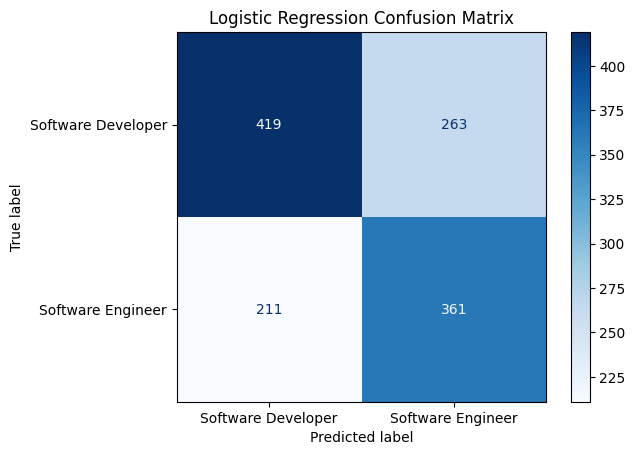

c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



=== Multinomial Naive Bayes ===
Accuracy: 0.6053
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       682
           1       0.57      0.56      0.56       572

    accuracy                           0.61      1254
   macro avg       0.60      0.60      0.60      1254
weighted avg       0.60      0.61      0.60      1254



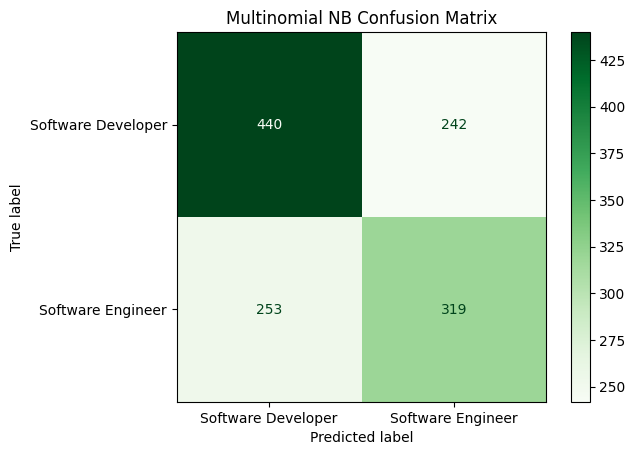

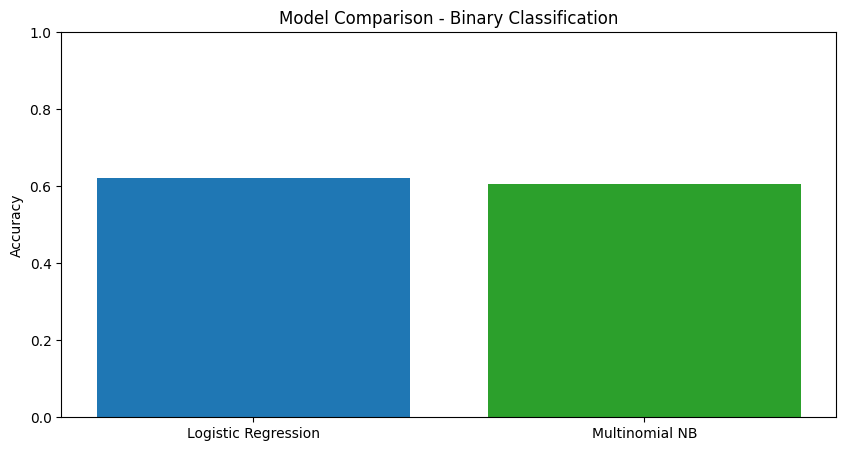

In [ ]:
# ================== Regression TAB Code ==================
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# ================== Data Preparation ==================
# Create binary classification dataset from existing data
# Let's consider two most common job roles
top_jobs = df['SuggestedJobRole'].value_counts().index[:2]
binary_df = df[df['SuggestedJobRole'].isin(top_jobs)].copy()

# Verify binary classes
print("Class distribution:\n", binary_df['SuggestedJobRole'].value_counts())

# Define features and target
X_bin = binary_df.drop('SuggestedJobRole', axis=1)
y_bin = LabelEncoder().fit_transform(binary_df['SuggestedJobRole'])

# Split data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_bin, y_bin, test_size=0.3, random_state=42
)

# ================== Preprocessing Pipeline ==================
# Modified pipeline for regression problem
preprocessor_bin = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
        ('text', CountVectorizer(
            tokenizer=lambda x: x.split(", "), 
            max_features=200,
            binary=True
        ), 'keywords')
    ],
    remainder='drop'
)

# ================== Logistic Regression ==================
# Create pipeline with preprocessing and logistic regression
logreg_pipe = make_pipeline(
    preprocessor_bin,
    LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
)

logreg_pipe.fit(X_train_bin, y_train_bin)

# Evaluate Logistic Regression
y_pred_logreg = logreg_pipe.predict(X_test_bin)
logreg_acc = accuracy_score(y_test_bin, y_pred_logreg)

print("\n=== Logistic Regression ===")
print(f"Accuracy: {logreg_acc:.4f}")
print(classification_report(y_test_bin, y_pred_logreg))

# Confusion Matrix
cm_logreg = confusion_matrix(y_test_bin, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg,display_labels=top_jobs)
disp_logreg.plot(cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# ================== Multinomial Naive Bayes ==================
# Create pipeline for MNB (using same preprocessing)
mnb_pipe = make_pipeline(
    preprocessor_bin,
    MultinomialNB(alpha=0.1)
)

mnb_pipe.fit(X_train_bin, y_train_bin)

# Evaluate MNB
y_pred_mnb = mnb_pipe.predict(X_test_bin)
mnb_acc = accuracy_score(y_test_bin, y_pred_mnb)

print("\n=== Multinomial Naive Bayes ===")
print(f"Accuracy: {mnb_acc:.4f}")
print(classification_report(y_test_bin, y_pred_mnb))

# Confusion Matrix
cm_mnb = confusion_matrix(y_test_bin, y_pred_mnb)
disp_mnb = ConfusionMatrixDisplay(confusion_matrix=cm_mnb,
                                display_labels=top_jobs)
disp_mnb.plot(cmap='Greens')
plt.title('Multinomial NB Confusion Matrix')
plt.show()

# ================== Model Comparison ==================
plt.figure(figsize=(10, 5))
models = ['Logistic Regression', 'Multinomial NB']
accuracies = [logreg_acc, mnb_acc]
plt.bar(models, accuracies, color=['#1f77b4', '#2ca02c'])
plt.ylim(0, 1)
plt.title('Model Comparison - Binary Classification')
plt.ylabel('Accuracy')
plt.show()